In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import os
import time

In [2]:
#downloading the dataset from the drive link
import gdown
!gdown 1x5YOnKLdQC3EgVyVmMc3V8eB6BZ5N78W

Downloading...
From: https://drive.google.com/uc?id=1x5YOnKLdQC3EgVyVmMc3V8eB6BZ5N78W
To: /content/gender.h5
100% 98.3M/98.3M [00:03<00:00, 32.5MB/s]


In [3]:
model = tf.keras.models.load_model('gender.h5')

In [4]:
class_lookup = {0:'female', 1:'male'}

def predict_image(img_path, class_lookup):
    img = image.load_img(img_path, target_size=(260,260))
    x = image.img_to_array(img)
    # Reshapecheckpoint
    x = x.reshape((1,) + x.shape)
    # x /= 255.
    result = model.predict([x])[0][0]
    result_verbose = model.predict([x])
    # print(result_verbose)
    predicted_class = class_lookup[np.argmax(result_verbose, axis=1)[0]]
    predicted_probability = result_verbose[0][np.argmax(result_verbose, axis=1)[0]]

    return predicted_class

# folder=r'male'
# count=0
# male_count=0
# female_count=0
# acc=0
# for filename in os.listdir(folder):
#     val=predict_image(os.path.join(folder,filename),class_lookup)
#     if val=='male':
#         male_count+=1
#     print(val)
#     img =cv2.imread(os.path.join(folder,filename))
#     img=cv2.resize(img,(640,640))
#     count+=1
#     cv2.putText(img, val, (0,150), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 4)
# # cv2.imwrite('result/male/img{}.jpg'.format(count),img)
# acc=(male_count/count)*100
# print(acc)

In [11]:
# This contains image for testing
!gdown 1QLRQX-74rG_lH-K2Tg_NSUQQT3l3hkrs

Downloading...
From: https://drive.google.com/uc?id=1QLRQX-74rG_lH-K2Tg_NSUQQT3l3hkrs
To: /content/female.jpg
100% 36.0k/36.0k [00:00<00:00, 55.8MB/s]


1/1 [==============================] - 0s 270ms/step


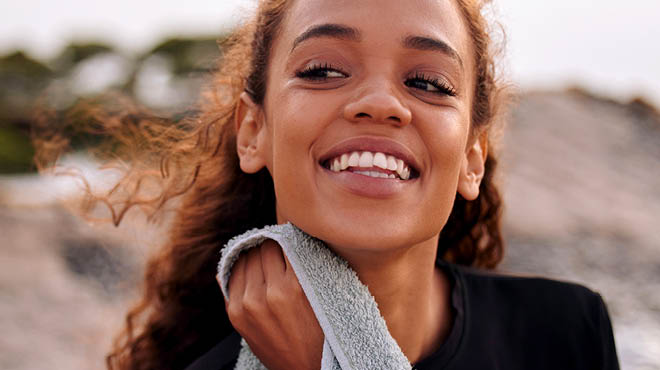

female


In [13]:
val=predict_image('/content/female.jpg',class_lookup)
from IPython.display import Image
display(Image('/content/female.jpg'))
print(val)

In [5]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00


In [6]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
import cv2

@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('gender.h5')
    return model

with st.spinner('Model is being loaded..'):
    model = load_model()

st.write("""
         # Gender Detection USING DEEP LEARNING
           by Moiz Ahmed Khan
         """
)
file = st.file_uploader("Please upload any image from the local machine in case of computer or upload camera image in case of mobile", type=["jpg", "png", "jpeg", "webp", "tif"])

def import_and_predict(image_data, model):
    size = (260, 260)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_reshape = img[np.newaxis, ...]

    prediction = model.predict(img_reshape)
    return prediction

if file is None:
    st.text("Please upload an image file within the allotted file size or retry if the error still persists...")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names = ['female', 'male']
    string = "THE Image CATEGORY IS: " + class_names[np.argmax(predictions)]
    st.success(string)
    string2 = "HOPE THIS HELPS!! THANK YOU FOR USING THIS PROJECT!!!"
    st.success(string2)


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.239.136.120:8501

npx: installed 22 in 4.671s
your url is: https://forty-zoos-run.loca.lt
2023-12-07 16:30:07.535112: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 16:30:07.535185: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 16:30:07.535225: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 16:30:08.790752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-07 16:30:17.869 